# Python Language Deeper Dive

We will now discuss additional components of the Python language including **functions**, **flow control**, **loops**, **modules**, and reading/writing data from disk. After working through this module you will be able to:

1. define and use **functions**. 
2. use **If...Else** statements, **While Loops**, and **For Loops**.
3. use **f-strings** and **list comprehension**. 
4. describe and interpret **classes** and **methods**.
5. access and use **modules** and **libraries**.
6. work with local files and directories. 

For a more detailed discussion of general Python, please consult [w3school.com](https://www.w3schools.com/python/), which is a great resource for coders, scientists, and web developers.

## Functions

### Functions

**Functions** do something when called. I think of them as tools. **Methods**, which we will discuss in more detail later in this module, are like functions except that they are tied to a specific object. When creating a new **class**, you can define methods specific to the new class. Functions generally have the following generic syntax: output = function(Parameter1, Parameter2). In contrast, methods will have the following generic syntax: output = object.method(Parameter1, Parameter2).  

Below, I am generating a simple function that multiplies two numbers together. The *def* keyword is used when defining a function. Within the parenthesis, a list of **parameters**, which are often specific inputs or required settings, can be provided. In this case, the function accepts two parameters: *a* and *b*. On the next line, indented, and after the colon, what the function does is defined. In this case, the function simply returns the product of the two values. The **return** keyword is used to define the output of the function (or what is returned), in this case the product of the two provided values.

Once a function is created, it can be used. In Example 1, I provide two **arguments**, or values assigned to the parameters, and save the result to a variable *x*.

When using a function, it is also possible to provide the arguments as *key* and *value* pairs, as in Example 2. 

When creating a function, default arguments can be provided for parameters when the function is defined. If arguments are not provided when the function is used, then the default values will be used, as demonstrated in Example 3.

This is a good time to stop and discuss indentation. Python makes use of whitespace, indentations, or tabs to denote or interpret units of code. This is uncommon, as most other languages use brackets or punctuation of some kind. So, it is important to properly use indentations or your code will fail to execute correctly or at all. 

In [1]:
#Example 1
def multab(a,b):
    return a*b

x = multab(3,6)
print(x)

#Example 2
x = multab(a=5, b=3)
print(x)

#Example 3
def multab(a=1,b=1):
    return a*b
x = multab()
print(x)

18
15
1


### \*args and \*\*kwargs

There are a few other options when defining functions that increase flexibility. For example, what if you wanted to edit the function created above so that it can accept more than two arguments and so that the number of arguments can vary? This can be accomplished using either **\*args** or **\*\*kwargs**.  

A single asterisk (\*) is used to unpack an iterable, such as a list, whereas two asterisks (\*\*) are used to unpack a dictionary. Using \*args allows you to to provide a variable number of non-keyword arguments (or, each argument does not need to be assigned a key). In contrast, \*\*kwargs is used to provide a variable number of keyword arguments (or, each argument must have a key).

In the first example below, I have altered the function from above to accept two or more arguments. Within the function, I define a variable *x1* that is initially assigned a value of 1. Then, inside of a **for loop**, which will be discussed below, I iteratively multiply *x1* by the next provided value. To test the function, a feed it the values 1 through 5 as non-keyword arguments. The result is calculated as 1x1 --> 1x2 --> 2x3 --> 6x4 --> 24x5 --> 120. Note that the single asterisk is key here. The work "args" could be replaced with another term, as the second part of the example demonstrates. What is important is that \* is used to unpack an iterable. 

In [2]:
def multab(*args):
    x1 = 1
    for a in args:
        x1 *= a
    return x1

x = multab(1, 2, 3, 4, 5)
print(x) 

def multab(*nums):
    x1 = 1
    for a in nums:
        x1 *= a
    return x1

x = multab(1, 2, 3, 4, 5)
print(x) 

120
120


The next example demonstrates the use of \*\*kwargs. Here, the arguments must have keys. Again, what is important here is the use of \*\* to unpack a dictionary: "kwargs" can be replaced with another term. Note the use of the *.values()* method for a dictionary. This allows access to the values as opposed to the associated keys.

In [3]:
def multab(**kwargs):
    x1 = 1
    for a in kwargs.values():
        x1 *= a
    return x1

x = multab(a=1, b=2, c=3, d=4, e=5)
print(x)

def multab(**nums):
    x1 = 1
    for a in nums.values():
        x1 *= a
    return x1

x = multab(a=1, b=2, c=3, d=4, e=5)
print(x)


120
120


The next block of code demonstrates the use of the single asterisk to unpack an iterable, in this case a list. Each element in the list is returned separately as opposed to as a single list object. This is the same functionality implemented by \*args.

In [4]:
x = [2,3,4,5]
print(*x)

2 3 4 5


Lastly, it is possible to use both \*args and \*\*kwargs in the same function. However, \*args must be provided before \*\*kwargs. In the example below, the parameter *a* is provided an argument of 1 while the parameter *b* is provided an argument of 2. 3 would be associated with \*args, since it is not assigned a key, while 4 and 5 would be associated with \*\*kwargs since they are assigned a key. 

In [5]:
def multab(a=2, b=2, *args, **kwargs):
    x1 = 1
    x1 *= a
    x1 *= b
    if args:
        for arg in args:
            x1 *= arg
    if kwargs:
        for kwarg in kwargs.values():
            x1 *= kwarg
    return x1

x = multab(1, 2, 3, c=3, d=4)
print(x)

72


As the examples above demonstrate, \*args and \*\*kwargs increase the flexibility of functions in Python by allowing for variable numbers of arguments. Even if you do not make use of these options, they are important to understand, as many functions that you encounter will make use of them. So, knowledge of this functionality will aid you in understanding how to implement specific functions and interpret the associated documentation. 

### Lambda

A **lambda function** is a special function case that is generally used for simple functions that can be anonymous or not named. They can accepted multiple arguments but can only include one expression. Lambda functions are commonly used inside of other functions. 

In [6]:
lam1 = lambda a, b, c: str(a) + " " + str(b) + " " + str(c)
print(lam1("Geospatial", "Data", "Science"))

a = "Geospatial"
b = "Dasta"
c = "Science"

Geospatial Data Science


### Scope

Variables are said to have **global scope** if they can be accessed anywhere in the code. In contrast, **local scope** implies that variables are only accessible in portions of the code. For example, by default new variables defined within a function cannot be called or used outside of the function. If you need to specify a variable within a function as having global scope, the *global* keyword can be used. 

In the first example below, the variables *xG*, *yG*, and *z* have global scope, so can be called and used outside of the function. In contrast, variables *xL* and *yL* have local scope and are not available outside of the function. If you attempt to run the last line of code, which is commented out, you will get an error. 

In [7]:
xG = 2
yG = 3
def Func1(a, b):
    xL = a*a
    yL = b*b
    return xL + yL

z = Func1(xG, yG)
print(xG)
print(z)
#print(xL+3) will not work due to local scope

2
13


If you need a variable declared inside of a function to have global scope, you can use the *global* keyword as demonstrated below. 

In [8]:
xG = 2
yG = 3
def Func1(a, b):
    global xL 
    xL = a*a
    global yL 
    yL = b*b
    return xL + yL

z = Func1(xG, yG)
print(xG)
print(z)
print(xL+3)

2
13
7


### Pass

It is not possible to leave a function empty when it is defined. As you develop code, you can make use of the *pass* keyword as a placeholder before adding content to a function. This will allow you to work with your code without errors until you complete the content within the function. *pass* can also be used within incomplete class definitions and loops. 

In [9]:
def multab(x, y):
    pass

## If...Else

All coding languages allow for **control flow** in which different code is executed depending on a condition. **If...Else** statements are a key component of how this is implemented. Using logical conditions that evaluate to *True* or *False*, it is possible to program different outcomes. 

The first example uses only *if*. So, if the condition evaluates to *True*, the remaining code will be executed. If it evaluates to *False* then nothing is executed or returned. In this case, the condition evaluates to *True*, so the text is printed.

Again, remember that indentation is very important in Python. The content of the *if* statement must be indented or the code will fail. 

In [10]:
x = 7
if x > 6:
    print(str(x) + " is greater than 6.")

7 is greater than 6.


It is common to have a default statement that is executed if the condition evaluates to *False* as opposed to simply doing nothing. This is the use of an *else* statement. No condition is required for the *else* statement since it will be executed for any case where the *if* condition evaluates to *False*. Again, note the required indentation. 

In [11]:
x = 3
if x > 6:
    print(str(x) + " is greater than 6.")
else:
    print(str(x) + " is less than or equal to 6.")

3 is less than or equal to 6.


What if you want to evaluate against more than one condition? This can be accomplished by incorporating one or multiple *elif* statements. The code associated with the *else* statement will only be executed if the *if* and all *elif* statements evaluate to *False*. 

All statements should be mutually exclusive or non-overlapping so that the logic is clear. In the second example, I have changed the first condition to *x >= 6*, so now the condition in the *if* and *elif* statements overlap. When the code is executed, the result from the *if* statement is returned. Since the first condition evaluated to *True*, the associated code was executed and the *elif* and *else* statements were ignored. If I swap the *if* and *elif* conditions, a different result is obtained. So, the order matters. In short, this ambiguity can be avoided by using conditions that are mutually exclusive and non-overlapping. 

In [12]:
x = 6
if x > 6:
    print(str(x) + " is greater than 6.")
elif x == 6:
     print(str(x) + " is equal to 6.")
else:
    print(str(x) + " is less than 6.")

6 is equal to 6.


In [13]:
x = 6
if x >= 6:
    print(str(x) + " is greater than 6.")
elif x == 6:
     print(str(x) + " is equal to 6.")
else:
    print(str(x) + " is less than 6.")


x = 6
if x == 6:
     print(str(x) + " is equal to 6.")
elif x >= 6:
     print(str(x) + " is greater than 6.")
else:
    print(str(x) + " is less than 6.")

6 is greater than 6.
6 is equal to 6.


## While Loop

**While loops** are used to loop code as long as a condition evaluates to *True*. In the example below, a variable *i* is initially set to 14. The loop executes as long as *i* remains larger than 7. At the end of each loop the *-=* **assignment operator** is used to subtract 1 from *i*. Also, *i* is simply a variable, so you do not need to use *i* specifically. For example, *i* could be replaced with *x*.

One potential issue with a while loop is the possibility of an **infinite loop** in which the loop never stops because the condition never evaluates to *False*. For example, if I change the assignment operator to *+=*, the condition will continue to evaluate to *True* indefinitely.

In [14]:
i = 14
while i > 7:
    print(i)
    i -= 1

14
13
12
11
10
9
8


## For Loop

**For Loops** will execute code for all items in a sequence. For loops make use of data types that are **iterable**, or that can return each individual element in the data object sequentially (for example, each string element in a list). Data types that are iterable include **lists**, **tuples**, **strings**, **dictionaries**, and **sets**. 
 
In the first example below, a for loop is being used to print every value in a list. In the next example, each character in a string is printed sequentially. Both lists and strings are iterable, so can be looped over.  

In [15]:
lst1 = [3, 6, 8, 9, 11, 13]
for i in lst1:
    print("Value is: " + str(i))

Value is: 3
Value is: 6
Value is: 8
Value is: 9
Value is: 11
Value is: 13


In [16]:
str1 = "Remote Sensing"
for c in str1:
    print(c)

R
e
m
o
t
e
 
S
e
n
s
i
n
g


Combining a for loop and If...Else statements allows for different code to be executed for each element in a sequence or iterable, such as a list, based on conditions, as demonstrated in the code below. In later modules, you will see example use cases for working with and analyzing spatial data. Note the levels of indentation used, which, again, are very important and required when coding in Python. The content in the for loop is indented with one tab while the content within the *if*, *elif*, and *else* statements, which are include in the for loop, are indented with two tabs. 

In [17]:
lst1 = [3, 6, 8, 9, 11, 13]
for i in lst1:
    if i < 8:
        print(str(i) + " is less than 8.")
    elif i == 8:
        print(str(i) + " is equal to 8.")
    else:
        print(str(i) + " is greater than 8.")

3 is less than 8.
6 is less than 8.
8 is equal to 8.
9 is greater than 8.
11 is greater than 8.
13 is greater than 8.


The *range()* function is commonly used in combination with for loops. Specifically, it is used to define an index for each element in an iterable that can then be used within the loop. 

In the example below, *range()* is used to define indices for all elements in a list. The *len()* function returns the length, so the returned indices will be 0 through the length of the list, in this case 4. The for loop will iterate over indices 0 through 3 (the last index is not included). This allows for the index to be used within the loop. In the example, the index is used to extract each element from the list and save it to a new local variable (*country*), which is then provided to a print statement. 

In [18]:
countries = ["Belgium", "Mexico", "Italy", "India"]
for i in range(len(countries)):
    country = countries[i]
    print("I would like to visit " + country + ".")

I would like to visit Belgium.
I would like to visit Mexico.
I would like to visit Italy.
I would like to visit India.


Another function that is commonly used in combination with for loops is *enumerate()*. For each element in the iterable, *enumerate()* will return an index and the element. Both can then be used within the loop. 

In the first example below, *enumerate()* is used to create an index and extract each element in the list sequentially. In this case, the enumeration is not necessary, since the index is not needed. However, in the next example, the index is used to print different results depending on whether the index is even or odd. So, *enumerate()* is needed because I need access to both the index and the data element within the loop. 

In [19]:
countries = ["Belgium", "Mexico", "Italy", "India"]
for index, country in enumerate(countries):
    print("I would like to visit " + country + ".")

I would like to visit Belgium.
I would like to visit Mexico.
I would like to visit Italy.
I would like to visit India.


In [20]:
countries = ["Belgium", "Mexico", "Italy", "India"]
for index, country in enumerate(countries):
    if index%2 == 0:
        print("I would like to visit " + country + ".")
    else:
        print("I would not like to visit " + country + ".")


I would like to visit Belgium.
I would not like to visit Mexico.
I would like to visit Italy.
I would not like to visit India.


There are some other useful techniques for flow control, code development, and error handling that we will not discuss in detail here. For example, **try**, **except**, and **finally** can be used to to handle errors and provide error messages. **break** is used to terminate a for loop based on a condition. **continue** can be used to skip the remaining steps in an iteration and move on to the next iteration in a loop.

## List Comprehension

**List comprehension** is a nice feature in Python. This technique allows you to create a new list from elements in an existing list and offers more concise syntax than accomplishing the same task using a for loop. 

In the first example, I am using list comprehension to return each element (*c*) in *lst1* to a new lst, *lst2*, if the string starts with the letter "B". Here is how I would read the syntax within the square brackets:

"Return the element (*c*) from the list (*lst1*) if its first character is "B".

In the second example, no condition is used. Instead, I am concatenating "I would like to visit " to each country and returning each result as an element in a new list. 

You will see examples of list comprehension in later modules. It is a very handy technique. 


In [21]:
lst1 = ["Belgium", "Mexico", "Italy", "India", "Bulgaria", "Belarus"]
lst2 = [c for c in lst1 if c[0] == "B"]
print(lst2)

['Belgium', 'Bulgaria', 'Belarus']


In [22]:
lst1 = ["Belgium", "Mexico", "Italy", "India", "Bulgaria", "Belarus"]
lst2 = ["I would like to visit " + c for c in lst1]
print(lst2)

['I would like to visit Belgium', 'I would like to visit Mexico', 'I would like to visit Italy', 'I would like to visit India', 'I would like to visit Bulgaria', 'I would like to visit Belarus']


## f-Strings

In Python, **f-strings** can be used to format printed strings or include variables within strings. This technique can be useful for generating well-formatted and useful print statements or dynamically using variables in printed strings. 

In the first example, I am printing *x* but with formatting defined to round to two decimal places. In the next example, I multiply *x* by itself in the printed string. Note that f-strings will begin with *f* followed by the statement in parenthesis. Variables or code will be placed in curly brackets, and formatting can be defined using syntax after a colon. In the first example, ":2f" indicates to round to two decimal places.

In the third example, I am calling *x* in a statement while in the fourth example I am using the *.upper()* method to convert the string to all uppercase in the printed statement. Lastly, I have edited the *enumerate()* example above with an f-string to print the country name and assigned index in the for loop. 

Throughout this course, you will see examples of f-strings for providing better formatted and/or more interpretable print output. 

In [23]:
x = 0.123456789
print(f'The value is {x:.2f}')
x = 6
print(f'{x} times 2 is equal to {x*x}')
x = "blue"
print(f'My favorite color is {x}.')
x = "blue"
print(f'My favorite color is {x.upper()}.')

countries = ["Belgium", "Mexico", "Italy", "India"]
for index, country in enumerate(countries):
    print(f'The index for {country} is {index}.')

The value is 0.12
6 times 2 is equal to 36
My favorite color is blue.
My favorite color is BLUE.
The index for Belgium is 0.
The index for Mexico is 1.
The index for Italy is 2.
The index for India is 3.


## Classes

I briefly mentioned **classes** in the last module. Here, I would like to provide a more in-depth discussion. Since Python is an object-based language, it is important to be able to define different types of objects. Classes serve as blueprints for creating new types of objects. Thus, the concept, use, and application of classes is very important in Python. 

To create a new class, you must use the *class* keyword. Here, I am generating a new class called *Course*. To construct a class, you must use the *\_\_init\_\_()* function. Within this function, you can assign values to object properties, and *\_\_init\_\_()*  will be executed any time a new instance of the class is created. When I create an instance of my *Course* class, three properties will be initiated: the subject code, course number, and course name. *self* references the current instance of the class. Although you can use a term other than *self*, *self* is the standard term used. Regardless of the term used, it must be the first parameter in *\_\_init\_\_()*. 

After the *\_\_init\_\_()* function, I then define a **method** that will be associated with the class. This method, *printCourse()*, will print the course name. Again, methods are functions that are associated with an object or class. In order to use the method, I must first create an instance of the class and provide arguments for the required parameters. I can then apply the method to the instance to print the course info. 

Once an instance of a class is created, the arguments assigned to properties can be changed using the following generic syntax: instance.property = new argument. Here, I am changing the *number* parameter of the *x* instance of the *Course* class to 350. I then use my *printCourse()* method again. 

In [24]:
class Course:
    def __init__(self, subject, number, name):
        self.subject = subject
        self.number = number
        self.name = name
    def printCourse(self):
        print("Course is " + self.subject + " " + str(self.number) + ": " + self.name)

x = Course("Geography", 550, "GIScience")
x.printCourse()
type(x)

x.number = 350
x.printCourse()


Course is Geography 550: GIScience
Course is Geography 350: GIScience


Once a class is created, **subclassess** can be derived from it. By default, subclasses will take on the properties and methods of the parent or superclass. However, you can alter or add properties and methods. This allows you to start with a more generic blueprint and refine it for a specific use case, as opposed to building a new class from scratch. 

In the example below, I have redefined the *Course* class then subclassed it to create the *Undergrad* class. I have added a parameter, which requires redefining the *\_\_init\_\_()* function. The *super()* function returns all of the parameters and methods of the parent class. The use of *super()* provides control over what is inherited by the child class from the parent. We will not explore all possible use cases here. I then define a new method called *printCourse2()*.

Once an instance of the *Undergrad* class is created, I can use both methods, since the *printCourse()* method was inherited from the parent class. 

In [25]:
class Course:
    def __init__(self, subject, number, name):
        self.subject = subject
        self.number = number
        self.name = name
    def printCourse(self):
        print("Course is " + self.subject + " " + str(self.number) + ": " + self.name)

class Undergrad(Course):
    def __init__(self, subject, number, name, level):
        super().__init__(subject, number, name)
        self.level = level
    def printCourse2(self):
       print("Undergrad Course is " + self.subject + " " + str(self.number) + ": " + self.name + ". " + "Must be a " + self.level + " to take this course.") 

x = Undergrad("Geography", 350, "GIScience", "Juniors")
x.printCourse()
x.printCourse2()


Course is Geography 350: GIScience
Undergrad Course is Geography 350: GIScience. Must be a Juniors to take this course.


You will not be required to created classes and subclasses in this course. However, it is important to understand this functionality of Python for making use of modules and libraries, as this is used extensively. For example, the [PyTorch](https://pytorch.org/) library, which is used for deep learning, makes extensive use of classes, and using it will require subclassing available classes. 

## Math Module

The functionality of Python is expanded using **modules**. Modules represent sets of code and tools and are combined into **libraries**. In this class, we will explore several modules or libraries used for data science including **NumPy**, **Pandas**, **matplotlib**, and **scikit-learn**. We will also explore libraries for geospatial data analysis including **GeoPandas** and **Rasterio**.

As an introduction to modules and libraries, we will now explore the **math module**. To use a module, it first needs to be **imported**. You can then use the methods provided by the module. When using a method from the math module, you must include the module name as demonstrated below.

In [26]:
import math

x = 4.318
print(math.cos(x))
print(math.sin(x))
print(math.tan(x))
print(math.sqrt(x))
print(math.log10(x))
print(math.floor(x))

-0.3842441480045495
-0.9232315174019233
2.4027210881322056
2.0779797881596442
0.6352826379982119
4


You can also provide an alias or shorthand name for the module when importing it by using the *as* keyword. This can be used to simplify code.

In [27]:
import math as m

x = 4.318
print(m.cos(x))
print(m.sin(x))
print(m.tan(x))
print(m.sqrt(x))
print(m.log10(x))
print(m.floor(x))

-0.3842441480045495
-0.9232315174019233
2.4027210881322056
2.0779797881596442
0.6352826379982119
4


If you want to import each individual function from a module and not need to use the module name or alias name in your code, you can use the import syntax demonstrated below. This is generally best to avoid, especially if the module is large and/or has many functions. 

In [28]:
from math import *

x = 4.318
print(cos(x))
print(sin(x))
print(tan(x))
print(sqrt(x))
print(log10(x))
print(floor(x))

-0.3842441480045495
-0.9232315174019233
2.4027210881322056
2.0779797881596442
0.6352826379982119
4


You can also import individual functions or subsets of functions as opposed to the entire module. 

In [29]:
from math import cos, sin
x = 4.318
print(cos(x))
print(sin(x))

-0.3842441480045495
-0.9232315174019233


## Working with Files

### Read Files

As a data scientist or geospatial data scientist, you will need to be able to use Python to work with and analyze files on your local machine. First, a file or folder path can be assigned to a variable. On a Windows machine, you will need to either (1) change the backslashes to forward slashes or (2) use the backslash escape character ahead of any backslash. 

In [30]:
txt1 = "D:/data/text_files/t1.txt" #Must change backslash to forward slash
txt1 = "D:\\data\\text_files\\t1.txt" #Or, use the backslash escape character

Specific modules or libraries will allow you to read in and work with specific types of data. For example, in the code below I am using **Pandas** to read in a comma-separated values (CSV) file as a Pandas DataFrame. We will discuss Pandas in a later module. 

In [31]:
import numpy as np
import pandas as pd
movies_df = pd.read_csv("D:/data/matts_movies.csv", sep=",", header=0, encoding="ISO-8859-1")
movies_df.head(10)

Movie Name             Director  Release Year  My Rating  \
0             Almost Famous        Cameron Crowe          2000       9.99   
1  The Shawshank Redemption       Frank Darabont          1994       9.98   
2             Groundhog Day         Harold Ramis          1993       9.96   
3              Donnie Darko        Richard Kelly          2001       9.95   
4           Children of Men       Alfonso Cuaron          2006       9.94   
5                Annie Hall          Woody Allen          1977       9.93   
6                  Rushmore         Wes Anderson          1998       9.92   
7                   Memento    Christopher Nolan          2000       9.91   
8    No Country for Old Men  Joel and Ethan Coen          2007       9.90   
9                     Seven        David Fincher          1995       9.88   

         Genre  Own  
0        Drama  Yes  
1        Drama  Yes  
2       Comedy  Yes  
3       Sci-Fi  Yes  
4       Sci-Fi  Yes  
5       Comedy  Yes  
6  Independent  Yes  
7     Thriller  Yes  
8     Thriller  Yes  
9     Thriller  Yes

The example below demonstrates one of many methods for reading in an image and adding it to the display. 

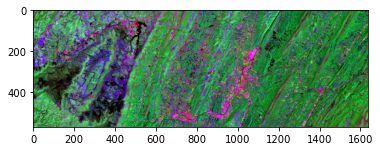

In [32]:
from matplotlib import pyplot as plt
import cv2

img = cv2.imread("D:/data/sentinel2.JPG")
plt.imshow(img)


### Working with Directories

Instead of reading in individual files, you may want to access entire lists of files in a directory. The example below demonstrates one method for accomplishing this using the **os** module and **list comprehension**. Specifically, it will find all TXT files in a directory and write their names to a list. 

Only the file name is included in the generated list, so I use additional list comprehension to add the full file path and generate a new list.

In [33]:
import os

direct = "D:/data/text_files"

files = os.listdir(direct)
files_txt = [i for i in files if i.endswith('.txt')]
print(files_txt)

txtlst = [direct + s for s in files_txt]
print(txtlst)

['t1.txt', 't2.txt', 't3.txt', 't4.txt', 't5.txt']
['D:/data/text_filest1.txt', 'D:/data/text_filest2.txt', 'D:/data/text_filest3.txt', 'D:/data/text_filest4.txt', 'D:/data/text_filest5.txt']


The code below demonstrates three other methods for reading in a list of TXT files from a directory. The first method uses the *listdir()* method from the **os** module, the second uses the *walk()* method form the **os** module (which allows for recursive searching within subdirectories), and the last method uses the **glob** module. 

You will see many other examples in this course of how to read files and lists of file names. 

In [34]:
from os import listdir
 
def list_files1(directory, extension):
    return (f for f in listdir(directory) if f.endswith('.' + extension))

from os import walk
 
def list_files2(directory, extension):
    for (dirpath, dirnames, filenames) in walk(directory):
        return (f for f in filenames if f.endswith('.' + extension))
    
from glob import glob
from os import getcwd, chdir
 
def list_files3(directory, extension):
    saved = getcwd()
    chdir(directory)
    it = glob('*.' + extension)
    chdir(saved)
    return it

direct = "D:/data/text_files"
method1 = list(list_files1(direct, "txt"))
method2 = list(list_files2(direct, "txt"))
method3 = list_files3(direct, "txt")
print(method1)
print(method2)
print(method3)

['t1.txt', 't2.txt', 't3.txt', 't4.txt', 't5.txt']
['t1.txt', 't2.txt', 't3.txt', 't4.txt', 't5.txt']
['t1.txt', 't2.txt', 't3.txt', 't4.txt', 't5.txt']


## Concluding Remarks

My goal here was to further discuss key characteristics of the Python language. Again, [w3school.com](https://www.w3schools.com/python/) is a great resource for coders, scientists, and web developers if you want to explore additional examples and topics. 

You likely do not feel comfortable with general Python yet. However, you will get practice while working through the remaining modules. I think you will find that a good grasp of the basics can go along way. 

In the next two modules, we will discuss two libraries that are central to data science in Python: **NumPy** and **Pandas**.